In [79]:
import pandas as pd
import numpy as np

# Load the CSV file with pandas
df = pd.read_csv('coeff_rivalu.csv')

year_list = np.arange(1991, 2025, 1)

# Extract coeff_tazionerivalu values for the years in anni_list
cumulative_inflation = df[df['anno'].isin(year_list)]['coeff_rivalu'].values



In [82]:
initial_effective_wadge = 1000
average_yearly_growth = 3 # in percentage, i.e. 3 means 3/100
variance = 0 # in percentage, i.e. 1 per 1/100


In [83]:
yearly_wadge = np.array([])
growth_coefficient_yearly = 1 + np.random.normal(loc=average_yearly_growth / 100, scale=variance / 100, size=len(year_list))
growth_coefficient_yearly[0] = 1  # Start from 1 for the first year
cumulative_growth_coefficient = np.cumprod(growth_coefficient_yearly)


In [94]:
structured_array = np.array(list(zip(year_list, cumulative_inflation, cumulative_growth_coefficient)), dtype=[('Year', 'i4'), ('Cumulative Inflation', 'f8'), ('Cumulative Growth', 'f8')])


In [106]:
structured_array['Year'][2021-1991]

np.int32(2021)

In [ ]:
def calculate_effective_wages_from_year(start_year, initial_effective_wage):
    """
    Calculate the wages and effective wages starting from a given year, and return a structured array.
    
    Parameters:
    - start_year: The year from which to start (e.g., 1998)
    - initial_wage: The wage to set for the start year
    
    Returns:
    - A structured NumPy array with 'Year', 'Wage', and 'Effective Wage'
    """
    # Find the index of the start year
    start_index = np.where(year_list == start_year)[0][0]
    
    # Initialize the wages and effective wages list
    wages = []
    effective_wages = []
    
    # Set the initial wage for the start year

    initial_wage/
    current_effective_wage = initial_effective_wage
    current_wage = initial_wage
    
    # Append the values for the start year
    wages.append(current_wage)
    effective_wages.append(current_effective_wage)
    
    # Calculate subsequent wages and effective wages for each year
    for i in range(start_index + 1, len(year_list)):
        # Apply growth (with randomness)
        growth_factor = 1 + np.random.normal(loc=average_yearly_growth / 100, scale=variance / 100)
        current_wage *= growth_factor
        
        # Adjust for inflation
        inflation_factor = cumulative_inflation[i]
        
        # Effective wage is adjusted for both growth and inflation
        current_effective_wage = current_wage * inflation_factor
        
        # Append the results for this year
        wages.append(current_wage)
        effective_wages.append(current_effective_wage)
    
    # Create the structured array
    structured_array = np.array(list(zip(year_list[start_index:], wages, effective_wages)), 
                                dtype=[('Year', 'i4'), ('Wage', 'f8'), ('Effective Wage', 'f8')])
    
    return structured_array

# Example usage of the function
start_year = 1998
initial_wage = 1000
structured_wages = calculate_effective_wages_from_year(start_year, initial_wage)

# Display the structured array
print(structured_wages)

[(1998, 1000.        , 1000.        ) (1999, 1036.99824183, 1698.76768656)
 (2000, 1083.10549458, 1729.33594719) (2001, 1095.8116351 , 1703.62527312)
 (2002, 1125.72433926, 1709.1109886 ) (2003, 1160.49861603, 1718.9330846 )
 (2004, 1218.09048292, 1768.86106246) (2005, 1248.57758123, 1782.82515214)
 (2006, 1267.95419639, 1774.9928776 ) (2007, 1320.4247365 , 1817.54740109)
 (2008, 1379.92088987, 1840.54561986) (2009, 1413.07881634, 1871.67014419)
 (2010, 1449.85614909, 1890.14069902) (2011, 1509.64435644, 1916.34378397)
 (2012, 1566.32602389, 1930.38402235) (2013, 1621.60627265, 1976.76849688)
 (2014, 1678.52930852, 2042.07459767) (2015, 1722.06833422, 2095.04354969)
 (2016, 1779.60808952, 2165.04558782) (2017, 1844.89523976, 2220.05241755)
 (2018, 1914.83018372, 2279.13803473) (2019, 1934.08673862, 2290.60523471)
 (2020, 1957.94381144, 2318.85998399) (2021, 2033.59097012, 2363.54416761)
 (2022, 2083.30373196, 2239.89167369) (2023, 2139.60227848, 2182.56338045)
 (2024, 2202.77657207, 22

In [ ]:
def wage(initial_year):
    ci = structured_array['Cumulative inflation'][initial_year-1991]
    iw = initial_effective_wadge/ci
    return structured_array['Year'][initial_year-1991]

In [85]:
wage_data = {}

for i, year in enumerate(year_list):
    # Get the corresponding values
    coeff_g = cumulative_growth_coefficient[i]
    cumulative_inf = cumulative_inflation[i]
    initial_wage = initial_effective_wadge/cumulative_inflation[0]
    
    # Calculate the effective product (Cumulative Product * Coeff. Tazionerivalu)
    wage_calc = coeff_g * initial_wage
    effective_wage_calc = cumulative_inf * coeff_g * initial_wage
    
    # Store the values in the dictionary
    wage_data[year] = {
        'coeff': coeff_g,
        'cumulative coeff': cumulative_inf,
        'wage':  wage_calc,
        'effective wage':  effective_wage_calc
    }

In [86]:
print(wage_data)

{np.int64(1991): {'coeff': np.float64(1.0), 'cumulative coeff': np.float64(2.153269782), 'wage': np.float64(464.4099909632224), 'effective wage': np.float64(1000.0)}, np.int64(1992): {'coeff': np.float64(1.03), 'cumulative coeff': np.float64(2.04295046), 'wage': np.float64(478.3422906921191), 'effective wage': np.float64(977.2296028069185)}, np.int64(1993): {'coeff': np.float64(1.0609), 'cumulative coeff': np.float64(1.960605046), 'wage': np.float64(492.69255941288264), 'effective wage': np.float64(965.9755181115524)}, np.int64(1994): {'coeff': np.float64(1.092727), 'cumulative coeff': np.float64(1.88701159), 'wage': np.float64(507.47333619526916), 'effective wage': np.float64(957.6080670164395)}, np.int64(1995): {'coeff': np.float64(1.1255088100000001), 'cumulative coeff': np.float64(1.790333582), 'wage': np.float64(522.6975362811273), 'effective wage': np.float64(935.8029524327656)}, np.int64(1996): {'coeff': np.float64(1.1592740743), 'cumulative coeff': np.float64(1.723131456), 'wag

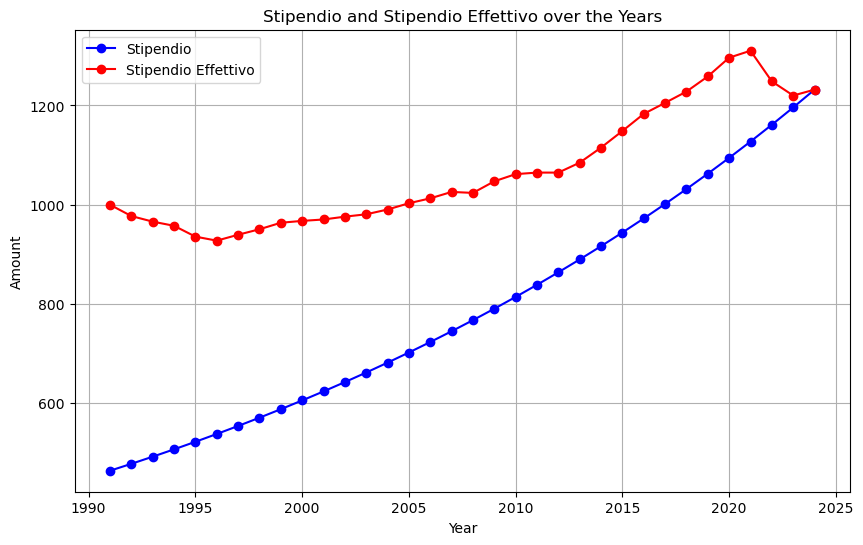

In [87]:
import matplotlib.pyplot as plt

# Extracting data for the plot
years = list(wage_data.keys())
stipendio = [wage_data[year]['wage'] for year in years]
stipendio_effettivo = [wage_data[year]['effective wage'] for year in years]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, stipendio, label='Stipendio', marker='o', color='blue')
plt.plot(years, stipendio_effettivo, label='Stipendio Effettivo', marker='o', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Stipendio and Stipendio Effettivo over the Years')

# Adding a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


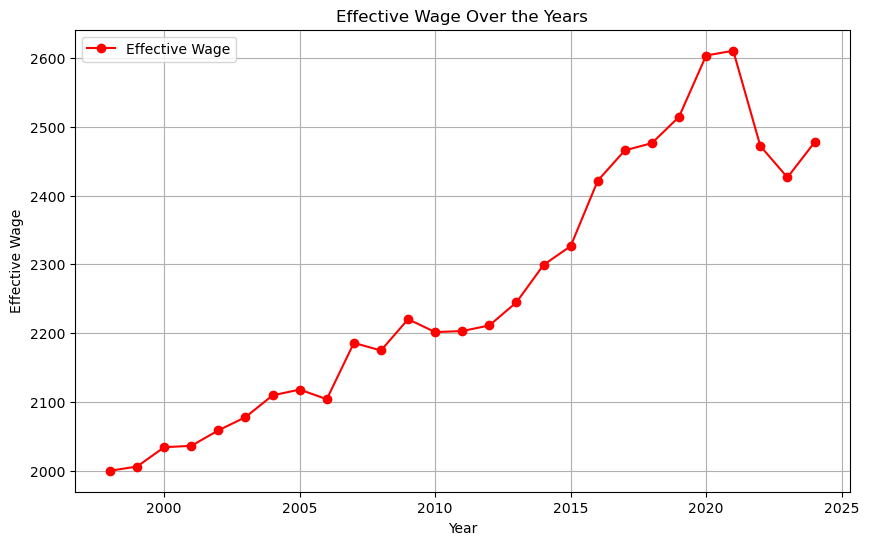

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_effective_wages(start_year, end_year, initial_effective_wage, average_yearly_growth=3, variance=0):
    """
    Calculate the effective wages from start_year to end_year, given an initial wage at start_year.
    
    Parameters:
    - start_year (int): The starting year (e.g., 1998)
    - end_year (int): The ending year (e.g., 2024)
    - initial_effective_wage (float): The effective wage at the start year
    - average_yearly_growth (float): The average yearly wage growth in percentage (default 3%)
    - variance (float): The variance of the yearly growth in percentage (default 0%)
    
    Returns:
    - wage_data (dict): A dictionary containing wage information for each year
    - effective_wages (list): An array of the effective wages for each year
    """
    # Load the CSV file with pandas
    df = pd.read_csv('coeff_rivalu.csv')

    # Extract the list of years and cumulative inflation values for the specified range
    year_list = np.arange(start_year, end_year + 1, 1)
    cumulative_inflation = df[df['anno'].isin(year_list)]['coeff_rivalu'].values
    
    # Generate random growth coefficients
    growth_coefficient_yearly = 1 + np.random.normal(
        loc=average_yearly_growth / 100, 
        scale=variance / 100, 
        size=len(year_list)
    )
    growth_coefficient_yearly[0] = 1  # Start with no growth in the first year
    cumulative_growth_coefficient = np.cumprod(growth_coefficient_yearly)

    # Calculate the initial wage for the start year in "real" terms
    initial_wage = initial_effective_wage / cumulative_inflation[0]  # Normalize wage for inflation at the start

    wage_data = {}
    effective_wages = []

    for i, year in enumerate(year_list):
        coeff_g = cumulative_growth_coefficient[i]
        cumulative_inf = cumulative_inflation[i]
        
        # Calculate the wage and effective wage
        wage_calc = coeff_g * initial_wage
        effective_wage_calc = cumulative_inf * coeff_g * initial_wage
        
        # Store the values in the dictionary
        wage_data[year] = {
            'coeff': coeff_g,
            'cumulative coeff': cumulative_inf,
            'wage': wage_calc,
            'effective wage': effective_wage_calc
        }
        
        effective_wages.append(effective_wage_calc)
    
    return wage_data, effective_wages

# Example usage
wage_data, effective_wages = calculate_effective_wages(
    start_year=1998, 
    end_year=2024, 
    initial_effective_wage=2000, 
    average_yearly_growth=3, 
    variance=1
)

# Plot the effective wage
years = list(wage_data.keys())
plt.figure(figsize=(10, 6))
plt.plot(years, effective_wages, label='Effective Wage', marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Effective Wage')
plt.title('Effective Wage Over the Years')
plt.grid(True)
plt.legend()
plt.show()


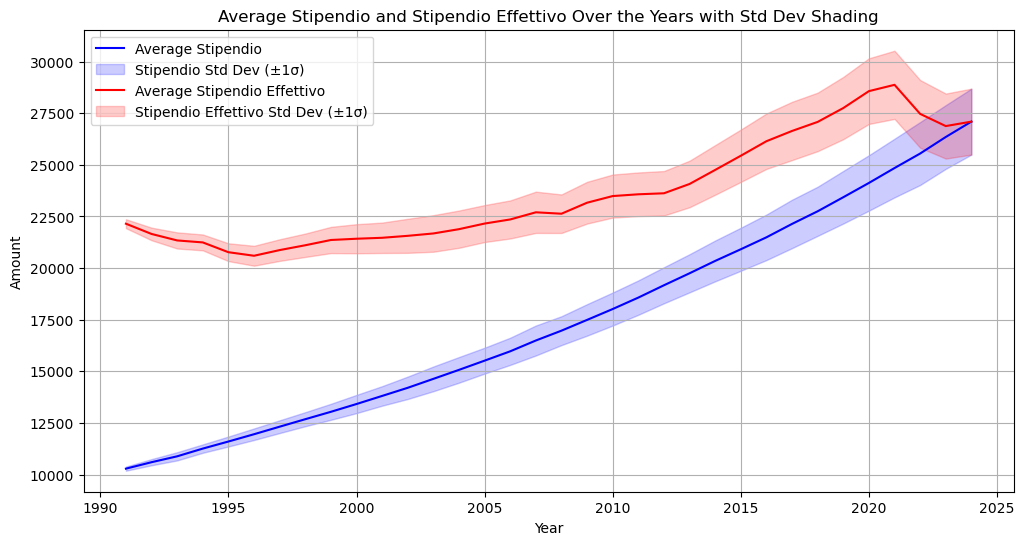

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file with pandas
df = pd.read_csv('coeff_rivalu.csv')

# Define the years and other parameters
anni_list = np.arange(1991, 2025, 1)
stipendio_iniziale = 10000
crescita_media_stipendio_annuale = 3  # in percentage (3% annual growth)
varianza = 1  # in percentage (1% variance)

# Extract coeff_rivalu values for the years in anni_list
coeff_rivalu = df[df['anno'].isin(anni_list)]['coeff_rivalu'].values

# Run 50 simulations
num_simulations = 50
stipendio_all_simulations = []
stipendio_effettivo_all_simulations = []

for _ in range(num_simulations):
    # Simulate random growth coefficients for this simulation
    coeff_crescita_stipendio = 1 + np.random.normal(loc=crescita_media_stipendio_annuale / 100, 
                                                  scale=varianza / 100, size=len(anni_list))
    cumulative_product = np.cumprod(coeff_crescita_stipendio)  # Calculate the cumulative product

    # Calculate stipendio and stipendio effettivo for this simulation
    stipendio_simulation = cumulative_product * stipendio_iniziale
    stipendio_effettivo_simulation = cumulative_product * coeff_rivalu * stipendio_iniziale

    # Store the results for this simulation
    stipendio_all_simulations.append(stipendio_simulation)
    stipendio_effettivo_all_simulations.append(stipendio_effettivo_simulation)

# Convert to numpy arrays for easier handling
stipendio_all_simulations = np.array(stipendio_all_simulations)
stipendio_effettivo_all_simulations = np.array(stipendio_effettivo_all_simulations)

# Calculate the average stipendio and stipendio effettivo for each year
stipendio_mean = np.mean(stipendio_all_simulations, axis=0)
stipendio_effettivo_mean = np.mean(stipendio_effettivo_all_simulations, axis=0)

# Calculate the standard deviation (spread) around the average
stipendio_std = np.std(stipendio_all_simulations, axis=0)
stipendio_effettivo_std = np.std(stipendio_effettivo_all_simulations, axis=0)

# Plotting the average stipendio and stipendio effettivo with shading for variability
plt.figure(figsize=(12, 6))

# Plot stipendio mean and add shading (mean ± std)
plt.plot(anni_list, stipendio_mean, label='Average Stipendio', color='blue')
plt.fill_between(anni_list, stipendio_mean - stipendio_std, stipendio_mean + stipendio_std, 
                 color='blue', alpha=0.2, label='Stipendio Std Dev (±1σ)')

# Plot stipendio effettivo mean and add shading (mean ± std)
plt.plot(anni_list, stipendio_effettivo_mean, label='Average Stipendio Effettivo', color='red')
plt.fill_between(anni_list, stipendio_effettivo_mean - stipendio_effettivo_std, stipendio_effettivo_mean + stipendio_effettivo_std, 
                 color='red', alpha=0.2, label='Stipendio Effettivo Std Dev (±1σ)')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Average Stipendio and Stipendio Effettivo Over the Years with Std Dev Shading')

# Adding a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
